In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","una1","una2","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]
len(colnames)

42

In [2]:
dataset_url = 'https://raw.githubusercontent.com/Draconov/cyber-sec-project1/refs/heads/main/corrected.csv'
df = pd.read_csv(dataset_url,header=None,names=colnames)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [3]:
df.shape

(311029, 42)

In [4]:
df.to_csv("revised_kddcup_dataset.csv") #this is revised csv

#extracting the icmp packets from our dataset
icmp_df = df[df.loc[:,"protocol_type"] == "icmp"]
icmp_df.isnull().sum() #values in dataset are not null

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [5]:
icmp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
82,0,icmp,eco_i,SF,30,0,0,0,0,0,...,3,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,normal.
156,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,75,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
406,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,98,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
629,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,120,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
767,0,icmp,eco_i,SF,30,0,0,0,0,0,...,2,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
features = ["duration","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"]
target = "result"
x = icmp_df.loc[:,features]
y = icmp_df.loc[:,target]
classes = np.unique(y)
print(classes)

['ipsweep.' 'multihop.' 'normal.' 'pod.' 'saint.' 'satan.' 'smurf.'
 'snmpguess.']


<ipython-input-7-ae70b46ea2f0>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  icmp_df = icmp_df.replace(classes[i], 1)
<ipython-input-7-ae70b46ea2f0>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  icmp_df=icmp_df.replace("urp_i",0.2)


[]

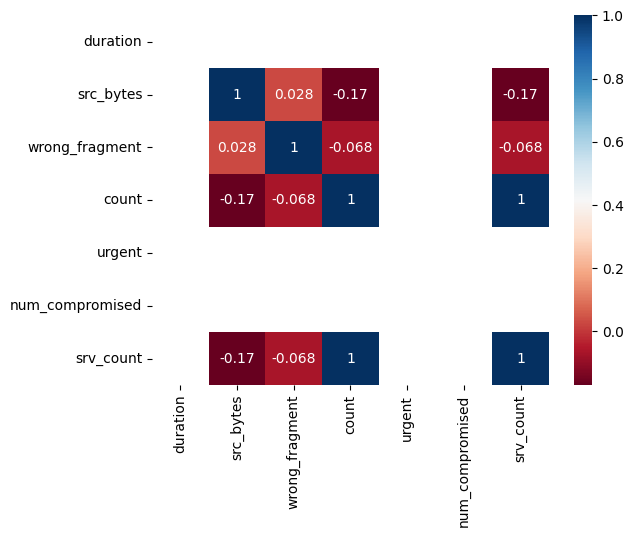

In [7]:
#We replace all classes of attack with 1 and normal result with 0 in our icmp_df
for i in range(len(classes)):
    if i == 2:
        icmp_df = icmp_df.replace(classes[i], 0)
    else:
        icmp_df = icmp_df.replace(classes[i], 1)

#turning the service attribute to categorical values
icmp_df=icmp_df.replace("eco_i",-0.1)
icmp_df=icmp_df.replace("ecr_i",0.0)
icmp_df=icmp_df.replace("tim_i",0.1)
icmp_df=icmp_df.replace("urp_i",0.2)

y = icmp_df.loc[:,target]
sns.heatmap(x.corr(), annot=True,cmap="RdBu")
plt.plot()
#the data as seen is highly uncorrelated as most of it is one valued such as the duration one.

In [8]:
x = icmp_df.loc[:,features]
y = icmp_df.loc[:,target]
x.head(5)

,duration,src_bytes,wrong_fragment,count,urgent,num_compromised,srv_count
82,0,30,0,2,0,0,2
156,0,30,0,2,0,0,2
406,0,30,0,2,0,0,2
629,0,30,0,1,0,0,1
767,0,30,0,3,0,0,1


In [9]:
print(list(x.loc[629,:])) #7 input features

[0, 30, 0, 1, 0, 0, 1]


In [10]:
print(y.loc[629])

0


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier()]
classifiers = ["LR", "KNN","MLP","DecisionTree"]
scores = []

for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of  model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

Accuracy of  model is:  99.80602533794023
Confusion Matrix:
 [[   97     9]
 [   87 49298]]
Report:
               precision    recall  f1-score   support

           0       0.53      0.92      0.67       106
           1       1.00      1.00      1.00     49385

    accuracy                           1.00     49491
   macro avg       0.76      0.96      0.83     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============
Accuracy of  model is:  99.99595886120709
Confusion Matrix:
 [[  105     1]
 [    1 49384]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       106
           1       1.00      1.00      1.00     49385

    accuracy                           1.00     49491
   macro avg       1.00      1.00      1.00     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============
Accuracy of  model is:  99.75349053363239
Confusion Matrix:
 [[  103     3]


In [13]:
scores=scores[:4]
scores

[99.80602533794023, 99.99595886120709, 99.75349053363239, 99.99797943060355]

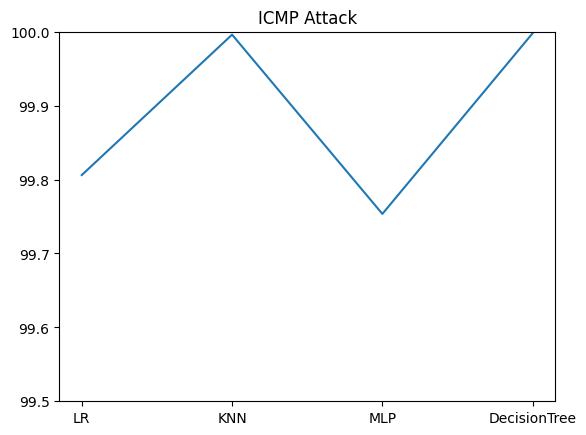

In [14]:
plt.plot(classifiers,scores)
plt.title("ICMP Attack")
plt.ylim(99.5,100)
plt.show()